In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart.csv


In [ ]:
import pandas as pd
df = pd.read_csv("Walmart.csv")
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# Check the updated column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# Summary statistics for all numerical columns
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [ ]:
# Total sales for each store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
store_sales.head(10)

,Weekly_Sales
Store,
20,3.013978e+08
4,2.995440e+08
14,2.889999e+08
13,2.865177e+08
2,2.753824e+08
10,2.716177e+08
27,2.538559e+08
6,2.237561e+08
1,2.224028e+08


In [ ]:
# Average weekly sales on holiday and non-holiday weeks
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

,Weekly_Sales
Holiday_Flag,
0,1.041256e+06
1,1.122888e+06


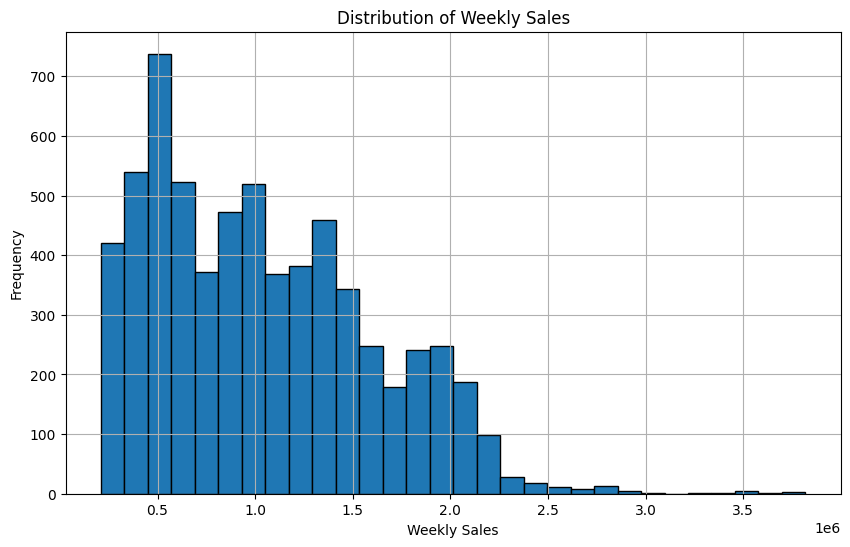

In [ ]:
import matplotlib.pyplot as plt
# Histogram of weekly sales
plt.figure(figsize=(10,6))
plt.hist(df['Weekly_Sales'], bins=30, edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

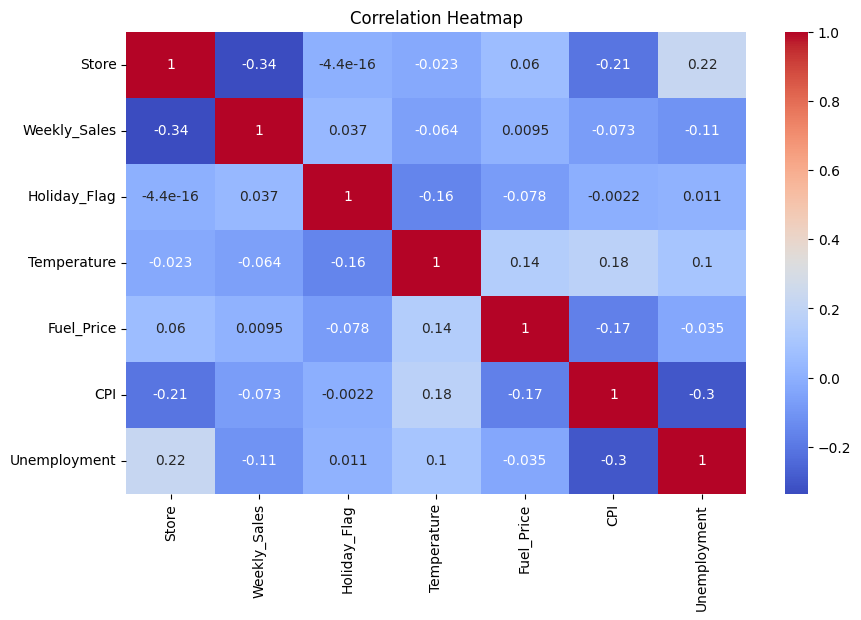

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

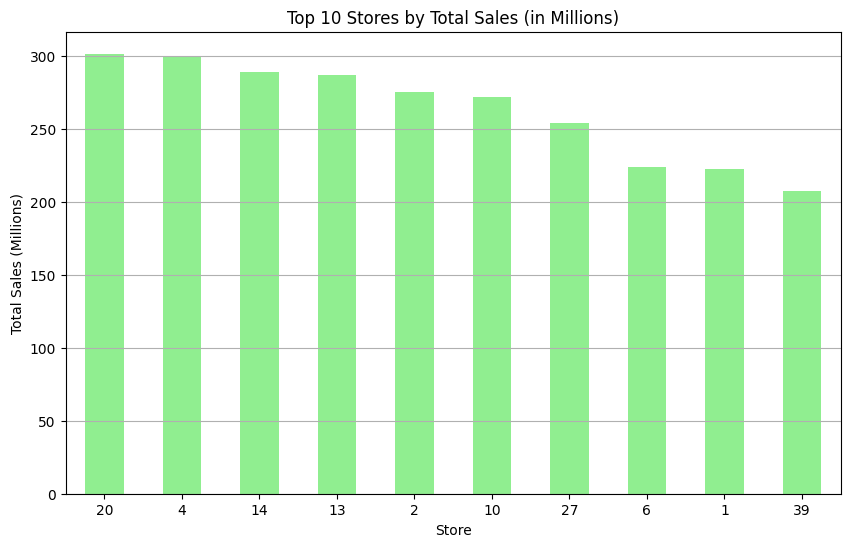

In [ ]:
# Bar plot of total sales per store
top_stores = store_sales.head(10)

plt.figure(figsize=(10, 6))
(top_stores / 1_000_000).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Stores by Total Sales (in Millions)')
plt.xlabel('Store')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

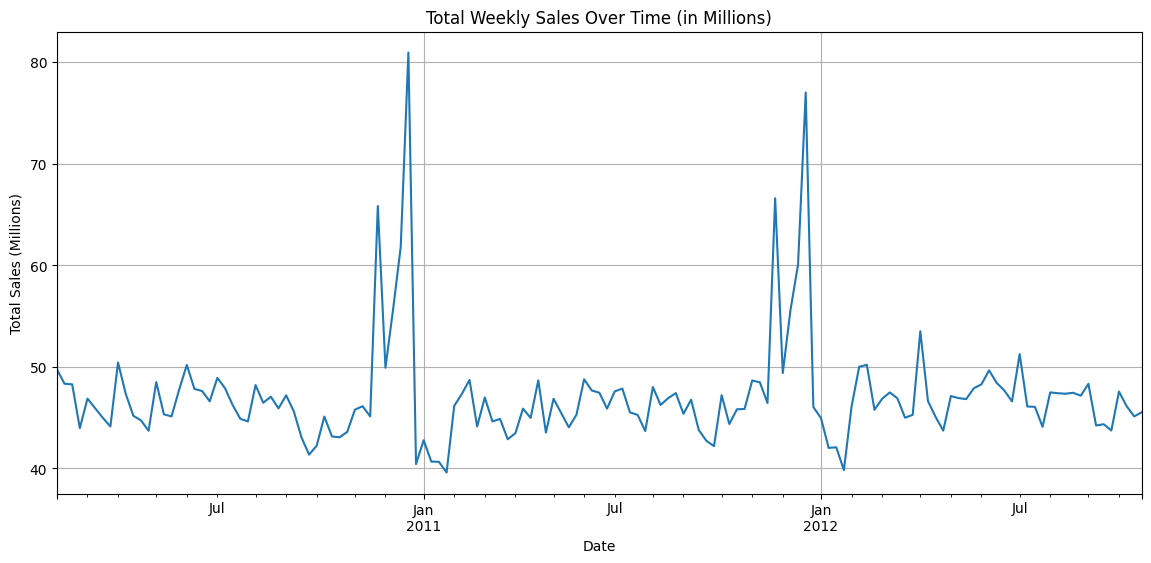

In [ ]:
# Line chart of total weekly sales over time
df_grouped = df.groupby('Date')['Weekly_Sales'].sum()

plt.figure(figsize=(14, 6))
(df_grouped / 1_000_000).plot()
plt.title('Total Weekly Sales Over Time (in Millions)')
plt.xlabel('Date')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)
plt.show()

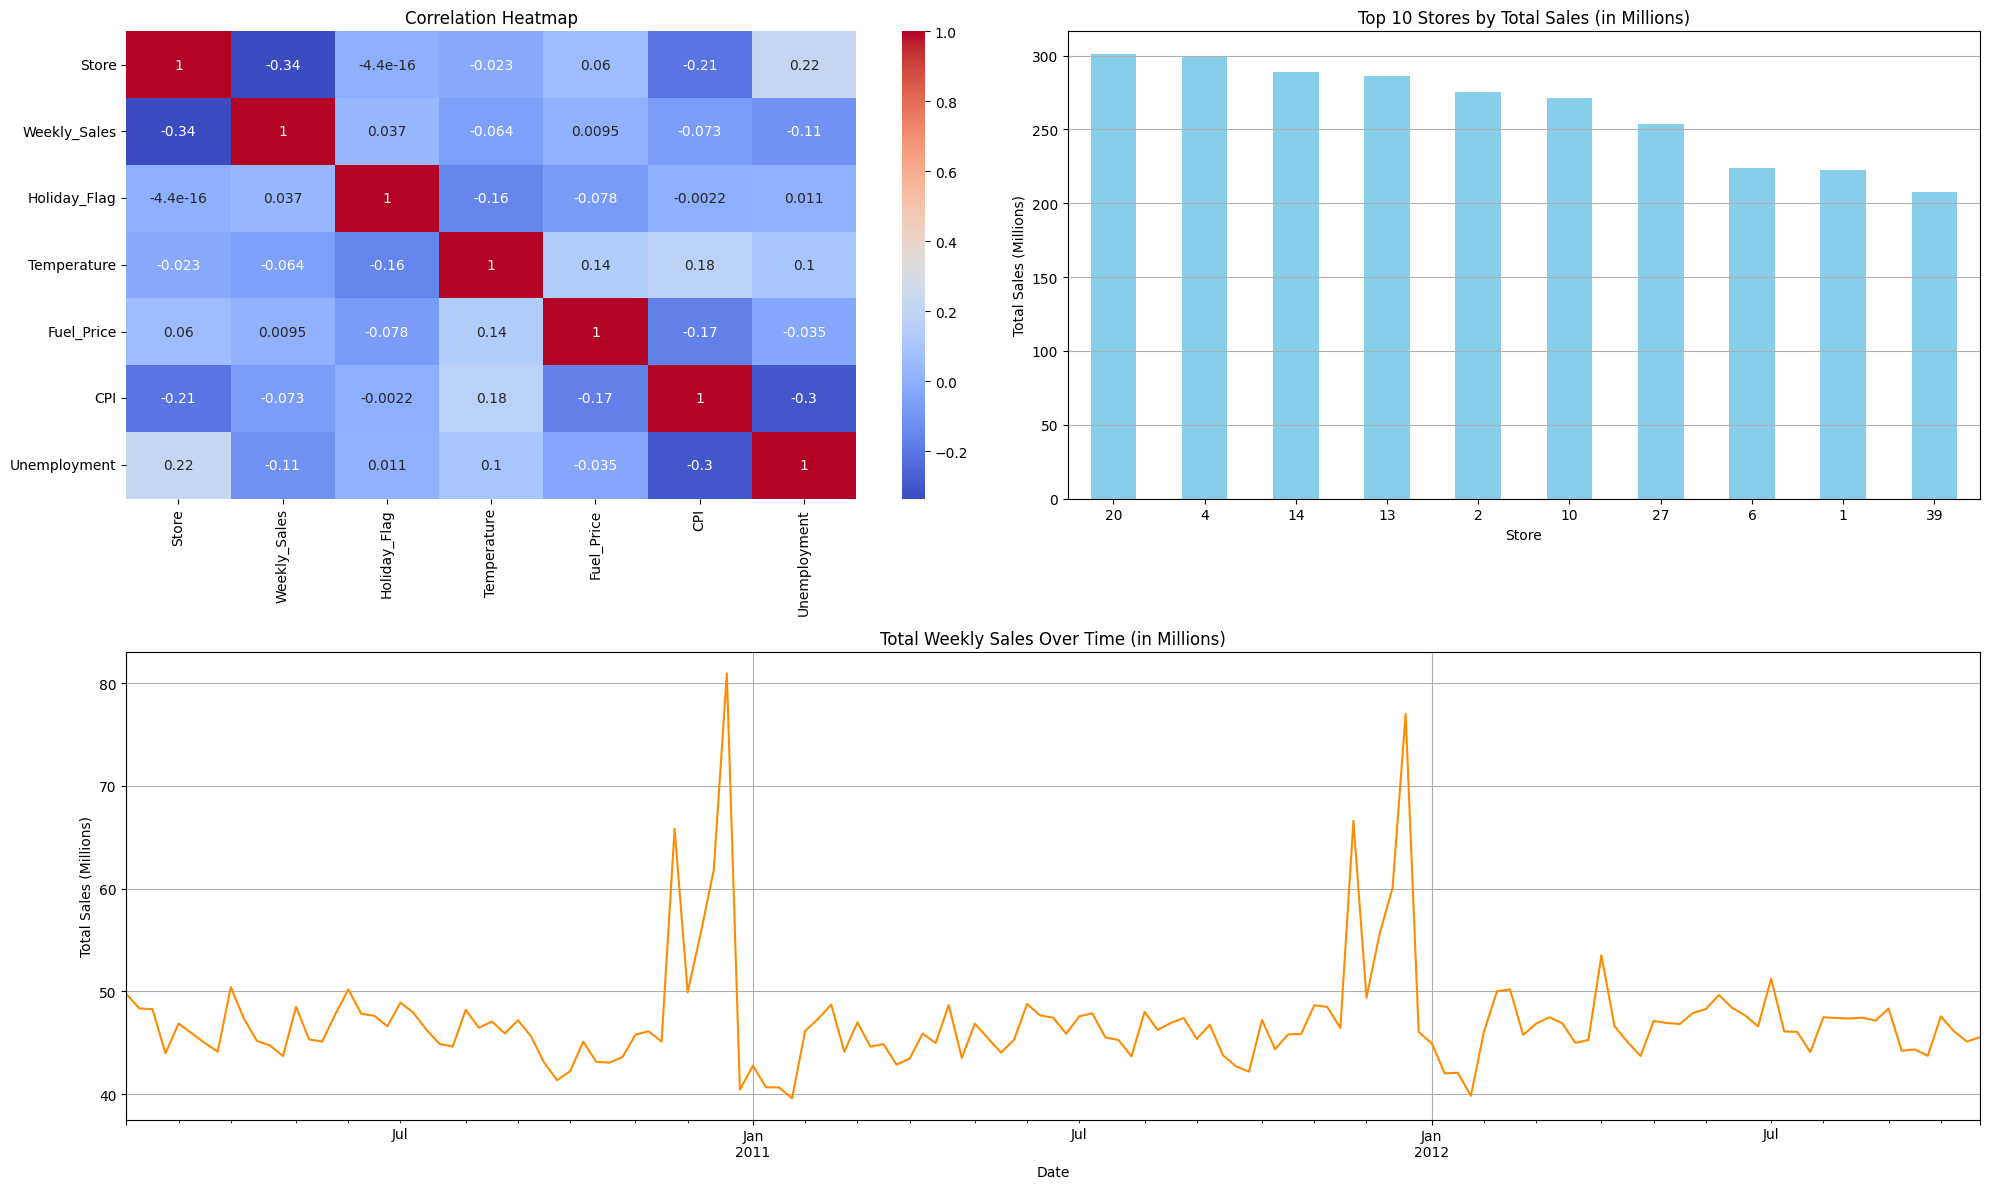

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.subplot(2, 2, 2)
(top_stores / 1_000_000).plot(kind='bar', color='skyblue')
plt.title('Top 10 Stores by Total Sales (in Millions)')
plt.xlabel('Store')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.subplot(2, 1, 2)
(df_grouped / 1_000_000).plot(color='darkorange')
plt.title('Total Weekly Sales Over Time (in Millions)')
plt.xlabel('Date')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Define features (X) and target (y)
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
X = df[features]
y = df['Weekly_Sales']

In [ ]:
from sklearn.model_selection import train_test_split
# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
# Define and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R² Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 274455221280.6605
R² Score: 0.148063534059508


In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Predict sales using test data
y_pred_rf = rf_model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R² Score:", r2_rf)

Random Forest - Mean Squared Error: 21677879001.42671
Random Forest - R² Score: 0.9327096947203809
